# 부산의 CCTV 지도에 시각화 해보기
* CCTV를 지도에 시각화 하기 위해서는 위도와 경도가 필요하기 때문에 
* 공공데이터포털의 CCTV 표준 데이터를 기준으로 한다.

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#시각화 라이브러리 설정
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# 한글폰트를 설정(한글을 사용한다면 반드시해야 함)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 해상도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [3]:
# 부산 진구와 부산시 북구 데이터는 찾아봐도 나오지 않음.. ㅠㅠ
강서구 = pd.read_csv(f'project_busan_cctv/부산광역시_강서구_CCTV.csv', encoding='cp949')
# 누락 소재지도로명주소 548
금정구 = pd.read_csv(f'project_busan_cctv/부산광역시_금정구_CCTV.csv',encoding='cp949')
# 누락 0
기장군 = pd.read_csv(f'project_busan_cctv/부산광역시_기장군_CCTV.csv', encoding='cp949')
# 누락 소재지도로명주소 437
남구 = pd.read_csv(f'project_busan_cctv/부산광역시_남구_CCTV.csv', encoding='cp949')
# 누락 소재지도로명주소 54, 소재지지번주소 29, 보관일수 209
동구 = pd.read_csv(f'project_busan_cctv/부산광역시_동구_CCTV.csv', encoding='cp949')
# 누락 0
동래구 = pd.read_csv(f'project_busan_cctv/부산광역시_동래구_CCTV.csv', encoding='cp949')
# 누락 설치년월 389
사상구 = pd.read_csv(f'project_busan_cctv/부산광역시_사상구_CCTV.csv', encoding='cp949')
# 누락 소재지도로명주소 78, 소재지지번주소 44
사하구 = pd.read_csv(f'project_busan_cctv/부산광역시_사하구_CCTV.csv', encoding='cp949')
# 누락 소재지도로명주소 73, 설치년월 176
서구 = pd.read_csv(f'project_busan_cctv/부산광역시_서구_CCTV.csv', encoding='cp949')
# 누락 0
수영구 = pd.read_csv(f'project_busan_cctv/부산광역시_수영구_CCTV.csv', encoding='cp949')
# 누락 0
연제구 = pd.read_csv(f'project_busan_cctv/부산광역시_연제구_CCTV.csv', encoding='cp949')
# 누락 소재지도로명주소 34
영도구 = pd.read_csv(f'project_busan_cctv/부산광역시_영도구_CCTV.csv', encoding='cp949')
# 누락 0
중구 = pd.read_csv(f'project_busan_cctv/부산광역시_중구_CCTV.csv', encoding='cp949')
# 누락 소재지도로명주소 6
해운대구 = pd.read_csv(f'project_busan_cctv/부산광역시_해운대구_CCTV.csv', encoding='cp949')
# 누락 설치년월 286

In [4]:
list(사하구.columns)
# 이중 필요한 데이터는 위도와 경도, 카메라대수 및 설치목적구분. 주소는 누락이 너무 많으므로 지도 시각화에서는 위도와 경도로 대체.

['관리기관명',
 '소재지도로명주소',
 '소재지지번주소',
 '설치목적구분',
 '카메라대수',
 '카메라화소수',
 '촬영방면정보',
 '보관일수',
 '설치년월',
 '관리기관전화번호',
 '위도',
 '경도',
 '데이터기준일자']

In [58]:
ctv_value = [강서구.shape[0],금정구.shape[0], 기장군.shape[0], 남구.shape[0], 동구.shape[0], 동래구.shape[0], 사상구.shape[0], 사하구.shape[0], 서구.shape[0], 수영구.shape[0], 연제구.shape[0], 영도구.shape[0], 중구.shape[0], 해운대구.shape[0]]
ctv_index = ['강서구','금정구','기장군','남구','동구','동래구','사상구','사하구','서구','수영구','연제구','영도구','중구','해운대구']
ctv_num=pd.DataFrame(data={'CCTV갯수': ctv_value}, index = ctv_index)
ctv_num

CCTV갯수
강서구      548
금정구      524
기장군     1013
남구       755
동구       723
동래구      389
사상구      436
사하구      776
서구       355
수영구      667
연제구      342
영도구      336
중구       377
해운대구     286

In [6]:
수영구.head(360)

관리기관명                  소재지도로명주소                소재지지번주소 설치목적구분  \
0    부산광역시 수영구청     부산광역시 수영구 수영로384번길 19      부산광역시 수영구 남천동 255   생활방범   
1    부산광역시 수영구청      부산광역시 수영구 남천서로20번길 7     부산광역시 수영구 남천동 70-9   생활방범   
2    부산광역시 수영구청     부산광역시 수영구 수영로408번길 35    부산광역시 수영구 남천동 16-13   생활방범   
3    부산광역시 수영구청     부산광역시 수영구 황령산로 7번길 40    부산광역시 수영구 남천동 54-12   생활방범   
4    부산광역시 수영구청     부산광역시 수영구 남천동로19번길 13     부산광역시 수영구 남천동 14-7   생활방범   
..          ...                       ...                    ...    ...   
355  부산광역시 수영구청    부산광역시 수영구 남천동로 10번길 42    부산광역시 수영구 남천동 19-11   생활방범   
356  부산광역시 수영구청  부산광역시 수영구 황령대로481번길 17-3      부산광역시 수영구 남천동 270   생활방범   
357  부산광역시 수영구청       부산광역시 수영구 무학로9번길 26   부산광역시 수영구 광안동 101-25   생활방범   
358  부산광역시 수영구청    부산광역시 수영구 망미번영로38번길 87  부산광역시 수영구 광안동 1060-13   생활방범   
359  부산광역시 수영구청     부산광역시 수영구 연수로348번길 38   부산광역시 수영구 광안동 1030-2  쓰레기단속   

     카메라대수  카메라화소수   촬영방면정보  보관일수     설치년월      관리기관전화번호         위도  \
0        4     200  360도전방면    30  2009-02  051-610-4492  35.139883   
1        1     200  360도전방면    30  2010-02  051-610-4492  35.144012   
2        1     200  360도전방면    30  2011-04  051-610-4492  35.141708   
3        1     200  360도전방면    30  2011-04  051-610-4492  35.146108   
4        1     200  360도전방면    30  2011-04  051-610-4492  35.142906   
..     ...     ...      ...   ...      ...           ...        ...   
355      4     200  360도전방면    30  2015-10  051-610-4492  35.141090   
356      1     200  360도전방면    30  2015-10  051-610-4492  35.139483   
357      4     200  360도전방면    30  2015-10  051-610-4492  35.162857   
358      4     200  360도전방면    30  2015-10  051-610-4492  35.168280   
359      1     200  360도전방면    30  2015-10  051-610-4492  15.169925   

             경도     데이터기준일자  
0    129.107744  2019-12-20  
1    129.106903  2019-12-20  
2    129.110051  2019-12-20  
3    129.108871  2019-12-20  
4    129.110749  2019-12-20  
..          ...         ...  
355  129.108168  2019-12-20  
356  129.107142  2019-12-20  
357  129.115191  2019-12-20  
358  129.112984  2019-12-20  
359  129.107839  2019-12-20  

[360 rows x 13 columns]

In [7]:
수영구.head(212)

관리기관명                 소재지도로명주소              소재지지번주소 설치목적구분  카메라대수  \
0    부산광역시 수영구청    부산광역시 수영구 수영로384번길 19    부산광역시 수영구 남천동 255   생활방범      4   
1    부산광역시 수영구청     부산광역시 수영구 남천서로20번길 7   부산광역시 수영구 남천동 70-9   생활방범      1   
2    부산광역시 수영구청    부산광역시 수영구 수영로408번길 35  부산광역시 수영구 남천동 16-13   생활방범      1   
3    부산광역시 수영구청    부산광역시 수영구 황령산로 7번길 40  부산광역시 수영구 남천동 54-12   생활방범      1   
4    부산광역시 수영구청    부산광역시 수영구 남천동로19번길 13   부산광역시 수영구 남천동 14-7   생활방범      1   
..          ...                      ...                  ...    ...    ...   
207  부산광역시 수영구청    부산광역시 수영구 장대골로39번길 26  부산광역시 수영구 광안동 570-1   생활방범      1   
208  부산광역시 수영구청     부산광역시 수영구 감포로12번길 60   부산광역시 수영구 민락동 39-1   생활방범      1   
209  부산광역시 수영구청  부산광역시 수영구 민락본동로 19번길 51   부산광역시 수영구 민락동 34-5   생활방범      1   
210  부산광역시 수영구청    부산광역시 수영구 연수로310번길 16  부산광역시 수영구 망미동 804-1  쓰레기단속      2   
211  부산광역시 수영구청     부산광역시 수영구 구락로153번길 6  부산광역시 수영구 망미동 187-3  쓰레기단속      1   

     카메라화소수   촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
0       200  360도전방면    30  2009-02  051-610-4492  35.139883  129.107744   
1       200  360도전방면    30  2010-02  051-610-4492  35.144012  129.106903   
2       200  360도전방면    30  2011-04  051-610-4492  35.141708  129.110051   
3       200  360도전방면    30  2011-04  051-610-4492  35.146108  129.108871   
4       200  360도전방면    30  2011-04  051-610-4492  35.142906  129.110749   
..      ...      ...   ...      ...           ...        ...         ...   
207     300  360도전방면    30  2012-12  051-610-4492  35.158421  129.108962   
208     300  360도전방면    30  2012-12  051-610-4492  35.160041  129.123861   
209     300  360도전방면    30  2012-12  051-610-4492  35.157767  129.126191   
210     200  360도전방면    30  2013-05  051-610-4492  35.172121  129.103432   
211     200  360도전방면    30  2013-05  051-610-4492  35.180510  129.114968   

        데이터기준일자  
0    2019-12-20  
1    2019-12-20  
2    2019-12-20  
3    2019-12-20  
4    2019-12-20  
..          ...  
207  2019-12-20  
208  2019-12-20  
209  2019-12-20  
210  2019-12-20  
211  2019-12-20  

[212 rows x 13 columns]

In [8]:
busan = [강서구,금정구,기장군,남구,동구,동래구,사상구,사하구,서구,수영구,연제구,영도구,중구,해운대구]
busan_cctv = pd.concat(busan).copy()
busan_cctv = busan_cctv.reset_index(drop=True).copy()

In [9]:
odddt1 = busan_cctv[busan_cctv['위도']<34].copy()
odddt1

관리기관명               소재지도로명주소               소재지지번주소 설치목적구분  카메라대수  \
5878  부산광역시 수영구청  부산광역시 수영구 연수로348번길 38  부산광역시 수영구 광안동 1030-2  쓰레기단속      1   
6739  부산광역시 영도구청    부산광역시 영도구 절영로513-35   부산광역시 영도구 동삼동 455-1    다목적      1   

      카메라화소수     촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
5878     200    360도전방면  30.0  2015-10  051-610-4492  15.169925  129.107839   
6739     200  360도 전 방면  30.0  2016-12  051-419-4862  30.072746  129.070808   

         데이터기준일자  
5878  2019-12-20  
6739  2020-03-17

In [10]:
odddt2 = busan_cctv[busan_cctv['위도']>36].copy()
odddt2

관리기관명                  소재지도로명주소               소재지지번주소 설치목적구분  \
6146  부산광역시 수영구청  부산광역시 수영구 연수로249번길 12-17  부산광역시 수영구 망미동 833-37  쓰레기단속   

      카메라대수  카메라화소수   촬영방면정보  보관일수     설치년월      관리기관전화번호         위도  \
6146      3     200  360도전방면  30.0  2019-05  051-610-4492  37.173796   

              경도     데이터기준일자  
6146  129.098919  2019-12-20

In [11]:
금정구

관리기관명                 소재지도로명주소               소재지지번주소 설치목적구분  카메라대수  \
0    부산광역시 금정구청  부산광역시 금정구 부산대학로64번길 149  부산광역시 금정구 장전동 157-14   생활방범      1   
1    부산광역시 금정구청  부산광역시 금정구 중앙대로1893번길 16  부산광역시 금정구 구서동 201-40   생활방범      1   
2    부산광역시 금정구청     부산광역시 금정구 팔송로18번길 27    부산광역시 금정구 남산동 16-2   생활방범      1   
3    부산광역시 금정구청     부산광역시 금정구 서부로69번길 26   부산광역시 금정구 서동 151-64   생활방범      1   
4    부산광역시 금정구청     부산광역시 금정구 동부곡로15번길 3   부산광역시 금정구 부곡동 287-6   생활방범      1   
..          ...                      ...                   ...    ...    ...   
519  부산광역시 금정구청       부산광역시 금정구 범어사로 305   부산광역시 금정구 청룡동 439-2   생활방범      2   
520  부산광역시 금정구청       부산광역시 금정구 회천로 24-1   부산광역시 금정구 회동동 293-1   생활방범      2   
521  부산광역시 금정구청     부산광역시 금정구 회천로13번길 87    부산광역시 금정구 금사동 27-9   생활방범      1   
522  부산광역시 금정구청          부산광역시 금정구 회천로 7   부산광역시 금정구 회동동 200-2   생활방범      2   
523  부산광역시 금정구청    부산광역시 금정구 회천로 13번길 13  부산광역시 금정구 회동동 200-12   생활방범      2   

     카메라화소수    촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
0       200  360도 전방면    30  2009-05  051-519-5731  35.238145  129.086054   
1       200  360도 전방면    30  2009-05  051-519-5731  35.253481  129.090309   
2       200  360도 전방면    30  2009-05  051-519-5731  35.273438  129.090378   
3       200  360도 전방면    30  2009-05  051-519-5731  35.218229  129.098620   
4       200  360도 전방면    30  2009-05  051-519-5731  35.225864  129.093181   
..      ...       ...   ...      ...           ...        ...         ...   
519     200  360도 전방면    30  2019-06  051-519-5731  35.279739  129.074056   
520     200  360도 전방면    30  2019-12  051-519-5731  35.227922  129.115563   
521     200  360도 전방면    30  2019-12  051-519-5731  35.224239  129.113025   
522     200  360도 전방면    30  2019-12  051-519-5731  35.226690  129.116572   
523     200  360도 전방면    30  2019-12  051-519-5731  35.226469  129.115820   

        데이터기준일자  
0    2020-02-19  
1    2020-02-19  
2    2020-02-19  
3    2020-02-19  
4    2020-02-19  
..          ...  
519  2020-02-19  
520  2020-02-19  
521  2020-02-19  
522  2020-02-19  
523  2020-02-19  

[524 rows x 13 columns]

In [12]:
부산 = busan_cctv[['설치목적구분','카메라대수','위도','경도']].copy()

In [13]:
부산

설치목적구분  카메라대수         위도          경도
0      생활방범      1  35.213185  128.947443
1      생활방범      1  35.217583  128.932435
2      생활방범      1  35.221807  128.946884
3      생활방범      1  35.220948  128.977828
4      생활방범      1  35.218883  128.955308
...     ...    ...        ...         ...
7522    다목적      2  35.181007  129.203343
7523    다목적      3  35.181614  129.203873
7524    다목적      3  35.181092  129.203837
7525    다목적      1  35.181296  129.203285
7526    다목적      1  35.181395  129.200864

[7527 rows x 4 columns]

In [14]:
import folium

<Figure size 1440x1080 with 0 Axes>

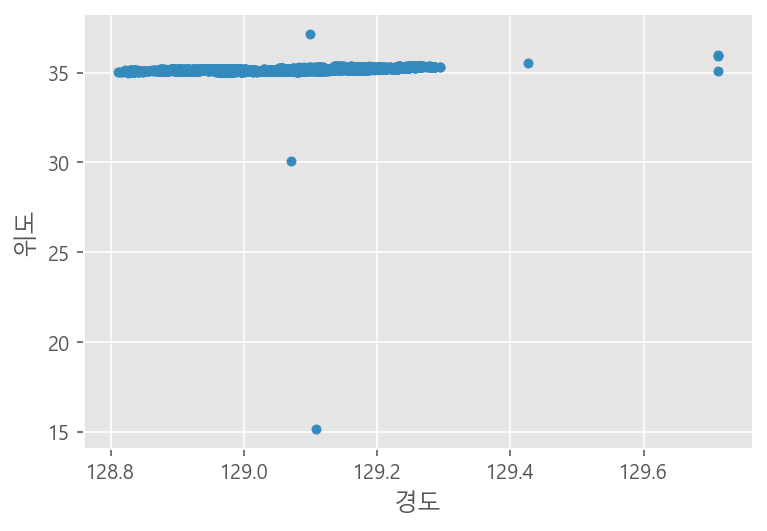

In [15]:
plt.figure(figsize =(20,15))
부산[['위도','경도']].plot.scatter(x='경도', y='위도')
# 위도가 35범위에서 벗어날수가 없는데 오타나 누락된 데이터인듯 싶어서 일단 확인해봄

In [16]:
odt1 = busan_cctv[busan_cctv['위도']>35.4].copy()
odt2 = busan_cctv[busan_cctv['위도']<34].copy()
odt3 = busan_cctv[busan_cctv['경도']>129.4].copy()

In [17]:
odt1
# 특이값의 모든 데이터는 지번주소나 도로명주소 중 더욱 상세히 나와있는 위치를 기준으로 위도와 경도를 재설정 함.

관리기관명                  소재지도로명주소               소재지지번주소 설치목적구분  \
5976  부산광역시 수영구청     부산광역시 수영구 민락수변로7번길 60     부산광역시 수영구 민락동 773   교통단속   
5983  부산광역시 수영구청      부산광역시 수영구 무학로69번길 98     부산광역시 수영구 민락동 779   생활방범   
5984  부산광역시 수영구청      부산광역시 수영구 무학로69번길 98     부산광역시 수영구 민락동 779   생활방범   
6146  부산광역시 수영구청  부산광역시 수영구 연수로249번길 12-17  부산광역시 수영구 망미동 833-37  쓰레기단속   

      카메라대수  카메라화소수   촬영방면정보  보관일수     설치년월      관리기관전화번호         위도  \
5976      4     210       고정  30.0  2017-04  051-610-4492  35.516089   
5983      1     200  360도전방면  30.0  2017-08  051-610-4492  35.956502   
5984      1     200  360도전방면  30.0  2017-08  051-610-4492  35.958309   
6146      3     200  360도전방면  30.0  2019-05  051-610-4492  37.173796   

              경도     데이터기준일자  
5976  129.426499  2019-12-20  
5983  129.712144  2019-12-20  
5984  129.711920  2019-12-20  
6146  129.098919  2019-12-20

In [18]:
odt2

관리기관명               소재지도로명주소               소재지지번주소 설치목적구분  카메라대수  \
5878  부산광역시 수영구청  부산광역시 수영구 연수로348번길 38  부산광역시 수영구 광안동 1030-2  쓰레기단속      1   
6739  부산광역시 영도구청    부산광역시 영도구 절영로513-35   부산광역시 영도구 동삼동 455-1    다목적      1   

      카메라화소수     촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
5878     200    360도전방면  30.0  2015-10  051-610-4492  15.169925  129.107839   
6739     200  360도 전 방면  30.0  2016-12  051-419-4862  30.072746  129.070808   

         데이터기준일자  
5878  2019-12-20  
6739  2020-03-17

In [19]:
odt3

관리기관명               소재지도로명주소            소재지지번주소 설치목적구분  카메라대수  \
5976  부산광역시 수영구청  부산광역시 수영구 민락수변로7번길 60  부산광역시 수영구 민락동 773   교통단속      4   
5983  부산광역시 수영구청   부산광역시 수영구 무학로69번길 98  부산광역시 수영구 민락동 779   생활방범      1   
5984  부산광역시 수영구청   부산광역시 수영구 무학로69번길 98  부산광역시 수영구 민락동 779   생활방범      1   
5985  부산광역시 수영구청   부산광역시 수영구 무학로69번길 98  부산광역시 수영구 민락동 779   생활방범      1   

      카메라화소수   촬영방면정보  보관일수     설치년월      관리기관전화번호         위도          경도  \
5976     210       고정  30.0  2017-04  051-610-4492  35.516089  129.426499   
5983     200  360도전방면  30.0  2017-08  051-610-4492  35.956502  129.712144   
5984     200  360도전방면  30.0  2017-08  051-610-4492  35.958309  129.711920   
5985     200  360도전방면  30.0  2017-08  051-610-4492  35.101452  129.712025   

         데이터기준일자  
5976  2019-12-20  
5983  2019-12-20  
5984  2019-12-20  
5985  2019-12-20

In [20]:
부산전체 = 부산.reset_index(drop=True).copy()

In [21]:
부산전체

설치목적구분  카메라대수         위도          경도
0      생활방범      1  35.213185  128.947443
1      생활방범      1  35.217583  128.932435
2      생활방범      1  35.221807  128.946884
3      생활방범      1  35.220948  128.977828
4      생활방범      1  35.218883  128.955308
...     ...    ...        ...         ...
7522    다목적      2  35.181007  129.203343
7523    다목적      3  35.181614  129.203873
7524    다목적      3  35.181092  129.203837
7525    다목적      1  35.181296  129.203285
7526    다목적      1  35.181395  129.200864

[7527 rows x 4 columns]

In [22]:
# 값 수정
부산전체.at[5878,'위도'] = 35.169925
부산전체.at[5976,'위도'] = 35.155602
부산전체.at[5976,'경도'] = 129.125789
부산전체.at[5983,'위도'] = 35.165589
부산전체.at[5983,'경도'] = 129.119916
부산전체.at[5984,'위도'] = 35.165531
부산전체.at[5984,'경도'] = 129.119931
부산전체.at[5985,'위도'] = 35.165672
부산전체.at[5985,'경도'] = 129.119884
부산전체.at[6146, '위도'] = 35.173796
부산전체.at[6739,'위도'] = 35.072746

<Figure size 864x288 with 0 Axes>

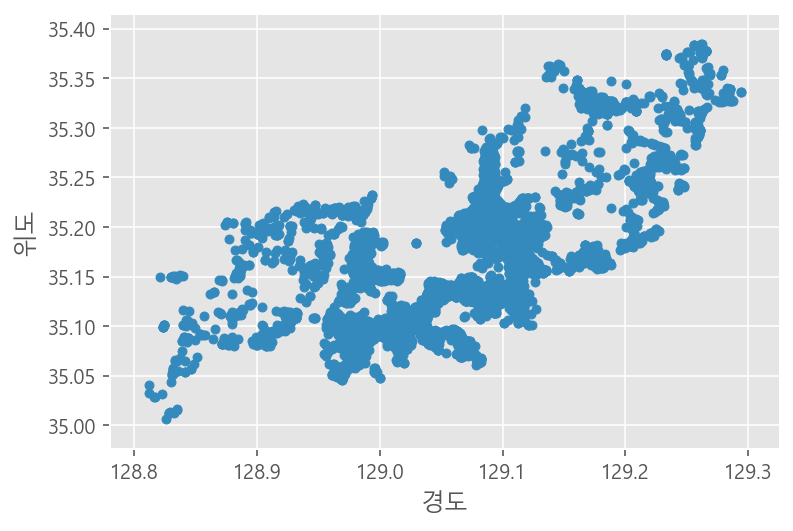

In [23]:
plt.figure(figsize=(12,4))
부산전체[['위도','경도']].plot.scatter(x='경도', y='위도')

In [24]:
lat = 부산전체['위도'].mean()
long = 부산전체['경도'].mean()
lat, long

(35.16439509949942, 129.06862943011168)

In [25]:
m= folium.Map(location = [lat, long], zoom_start = 15 , tiles = 'Stamen Toner')

In [26]:
m

In [27]:
for i in 부산전체.index:
    circle_lat = 부산전체.loc[i, '위도']
    circle_long = 부산전체.loc[i, '경도']
    folium.CircleMarker(location=[circle_lat, circle_long], radius=1.5, color='red').add_to(m)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493


4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639


6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6396
6397
6398
6399
6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460


In [28]:
m